<a href="https://colab.research.google.com/github/kollamohanchaitanya/Data-Science-projects/blob/main/ML_HW4(1316743).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

np.random.seed(2023)

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Now let's generate the first 5 images of x_train using plt.imshow:

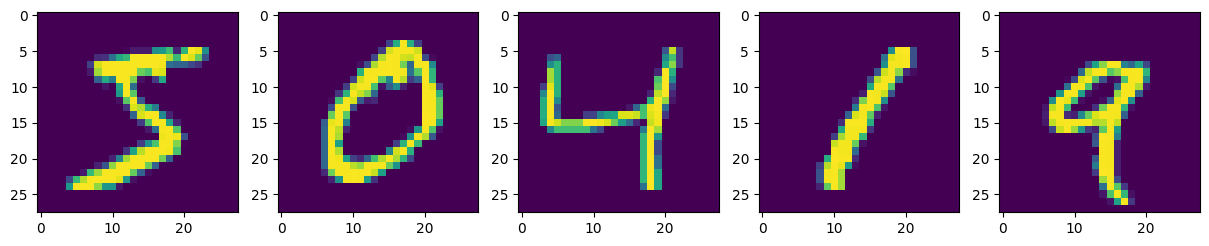

In [ ]:
# display the first 5 images of x_train
fig, ax = plt.subplots(1, 5, figsize=(15,15))
for i in range(5):
    ax[i].imshow(x_train[i])
plt.show()


flatten the inputs from each row being 28 by 28 to 784, and convert the datatype to float:

In [ ]:
# flatten input
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# convert datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


normalize the ranges of values from 0-255 to a value between 0-1 by dividing the entire dataset by 255 except for the labels:

In [ ]:
# normalize inputs
x_train = x_train / 255.0
x_test = x_test / 255.0


Finally, we need to one-hot encode the labels:

In [ ]:
# one-hot encode outputs
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)


Epoch 1/10
300/300 [==============================] - 4s 8ms/step - loss: 0.3075 - accuracy: 0.9132 - val_loss: 0.1313 - val_accuracy: 0.9616
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1149 - accuracy: 0.9660 - val_loss: 0.1001 - val_accuracy: 0.9695
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0759 - accuracy: 0.9772 - val_loss: 0.0904 - val_accuracy: 0.9715
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0733 - val_accuracy: 0.9767
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0736 - val_accuracy: 0.9771
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0738 - val_accuracy: 0.9781
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0658 - val_accuracy: 0.9818
Ep

After training, we can evaluate the model's accuracy and generate the confusion matrix:

In [ ]:
# evaluate model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)


313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9792
Accuracy: 97.92
313/313 [==============================] - 0s 1ms/step
[[ 973    0    0    2    1    1    1    0    1    1]
 [   0 1125    2    1    0    0    2    0    4    1]
 [   8    1  993    6    6    0    2    8    8    0]
 [   0    0    1  991    0    1    0    3    1   13]
 [   1    0    2    1  968    0    2    3    1    4]
 [   3    0    0   16    2  861    1    0    4    5]
 [   1    3    0    1    5    5  939    0    4    0]
 [   1    6    5    1    0    0    0 1003    4    8]
 [   3    0    2    2    4    0    1    2  954    6]
 [   3    2    0    1    8    2    0    5    3  985]]
